<a href="https://colab.research.google.com/github/cindyforray/Data-Science-Icaro/blob/main/Sprint_3/TP3_SR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3er entrega - Sistemas de recomendación

En esta entrega vamos a trabajar con un sistema de recomendación.

Vamos a aprovechar la competencia de Telecom que vimos ya que los datos son reales y están buenos para practicar.

En el siguiente repositorio pueden encontrar el significado de cada columna de los datasets:
https://github.com/Datathon2021/Recomendador

Consigna:

- Dividir set en train y test. Tomar como train los datos hasta el 1 de marzo de 2021. Desde el 1ro de marzo en adelante, reservar para test.
- Desarrollar un recomendador. El recomendador debe ser capaz de generar recomendaciones para TODOS los usuarios (incluyendo los cold start que no tengan visualizaciones en el set de train). Generar 20 recomendaciones por usuario.
- Las recomendaciones tienen que ser para cada account_id y hay que recomendar content_id (NO asset_id). Pueden encontrar esto en el repositorio de la competencia.
- Los contenidos que recomienden, no tienen que haber sido vistos previamente por los usuarios (filtrar).
- Evaluarlo con MAP.

Recomendaciones:
- En este caso no tenemos ratings explícitos como los casos que vimos, deben generar ustedes estos ratings mediante algún criterio. Lo más simple podría ser utilizar ratings binarios (lo vió / no lo vió).
- Hay una columna que nos indica hasta cuando va a estar disponible el contenido
- La columna **end_vod_date**: "fecha de finalización de la disponibilidad del activo en la plataforma" puede llegar a serles muy útil. ¿Tiene sentido recomendar algo que no va a estar disponible en el set de test? (a partir del 1 de marzo de 2021).
- Comiencen con algo SIMPLE. No se compliquen con todas las columnas que tiene el dataset. No van a necesitar usar todas, muchas columnas podrán descartarlas dependiendo del enfoque que tomen.

Datos:
- https://drive.google.com/file/d/1QjbqJvU0PTClEhReOyzr96BS-HpyyUKT/view?usp=sharing
- https://drive.google.com/file/d/1ih6SZc44w8FXdFKQJ2l-aqEWFpfceGuN/view?usp=sharing

Fecha de entrega: **30 de Enero de 2023**.

Subir a un repositorio de github (público) y enviar el link a alexispacek@gmail.com. De paso les sirve para ir armando su perfil de github con algunos proyectos 😉.

In [ ]:
import pandas as pd 

In [ ]:
data=pd.read_csv('C:\\Users\\DELL\\Desktop\\CursoDataScienceICARO\\Sistemas_Recomendacion\\data\\train.csv')
data.head()

,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume
0,0,90627,STATIONARY,18332.0,2021-02-18 22:52:00.0,2021-02-18 23:35:00.0,0
1,0,90627,STATIONARY,24727.0,2021-03-24 23:17:00.0,2021-03-25 00:01:00.0,0
2,1,3387,STB,895.0,2021-03-15 10:05:00.0,2021-03-15 10:23:00.0,0
3,1,3387,STB,895.0,2021-03-15 10:23:00.0,2021-03-15 11:18:00.0,1
4,1,3387,STB,26062.0,2021-03-16 09:24:00.0,2021-03-16 09:44:00.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657801 entries, 0 to 3657800
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  int64  
 1   account_id   int64  
 2   device_type  object 
 3   asset_id     float64
 4   tunein       object 
 5   tuneout      object 
 6   resume       int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 195.3+ MB


In [ ]:
from datetime import datetime
data['tunein'] = pd.to_datetime(data['tunein'])

In [ ]:
data['tuneout'] = pd.to_datetime(data['tuneout'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657801 entries, 0 to 3657800
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   customer_id  int64         
 1   account_id   int64         
 2   device_type  object        
 3   asset_id     float64       
 4   tunein       datetime64[ns]
 5   tuneout      datetime64[ns]
 6   resume       int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(1)
memory usage: 195.3+ MB


In [ ]:
data.tunein.min(), data.tunein.max(), 

(Timestamp('2021-01-01 00:00:00'), Timestamp('2021-03-31 23:59:00'))

In [ ]:
data.shape

(3657801, 7)

Carga de archivo de Metadato

In [ ]:
metadato=pd.read_csv('C:\\Users\\DELL\\Desktop\\CursoDataScienceICARO\\Sistemas_Recomendacion\\data\\metadata.csv', sep=";")
metadato.head()

,asset_id,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,...,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date
0,15188,0.0,Ep:17 Tiempos Compulsivos,Tiempos_Compul_E17,Episodio 17,Serie,2012.0,AR,Drama,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...",...,N,N,N,N,N,N,2017-12-01T10:18:15.0Z,2019-01-26T06:37:18.0Z,2017-12-01T00:00:00.0Z,2020-12-01T23:59:59.0Z
1,24940,1.0,7 Cajas,7_Cajas,NaN,Película,2012.0,PY,Suspenso/Acción,"Latinoamérica,Pobreza,Crimen,Pandillas",...,N,N,N,Y,N,N,2017-12-19T20:58:15.0Z,2019-09-17T19:02:03.0Z,2017-12-15T00:00:00.0Z,2022-12-14T23:59:59.0Z
2,21939,2.0,La Maldición de las Hormigas Gigantes,La_Maldicion_de_las,NaN,Película,2016.0,FI,Terror/Comedia,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...",...,N,N,N,N,N,N,2018-02-16T13:51:07.0Z,2020-04-28T14:16:38.0Z,2018-01-25T00:00:00.0Z,2020-12-01T23:59:59.0Z
3,9005,3.0,Una Mujer Fantástica,Una_Mujer_Fantastic,NaN,Película,2017.0,CL,Drama,"LGBT,Mujeres,Latinoamérica",...,N,N,N,N,Y,N,2018-05-26T11:58:44.0Z,2019-11-15T03:00:23.0Z,2018-05-27T00:00:00.0Z,2021-04-30T23:59:59.0Z
4,7391,4.0,Star Trek,Star_Trek,NaN,Película,2009.0,US,Ciencia Ficción/Aventura,"Fantasía,Galaxia,Futurismo,Aliens,Criaturas",...,N,N,N,Y,N,N,2019-05-03T20:07:24.0Z,2020-04-09T04:37:29.0Z,2019-05-02T00:00:00.0Z,2020-12-31T23:59:59.0Z


In [ ]:
metadato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   asset_id            33144 non-null  int64  
 1   content_id          33123 non-null  float64
 2   title               33144 non-null  object 
 3   reduced_title       33144 non-null  object 
 4   episode_title       28997 non-null  object 
 5   show_type           33140 non-null  object 
 6   released_year       33144 non-null  float64
 7   country_of_origin   33140 non-null  object 
 8   category            33144 non-null  object 
 9   keywords            33142 non-null  object 
 10  description         33142 non-null  object 
 11  reduced_desc        33144 non-null  object 
 12  cast_first_name     24412 non-null  object 
 13  credits_first_name  20590 non-null  object 
 14  run_time_min        33144 non-null  float64
 15  audience            33143 non-null  object 
 16  made

In [ ]:
metadato.columns

Index(['asset_id', 'content_id', 'title', 'reduced_title', 'episode_title',
       'show_type', 'released_year', 'country_of_origin', 'category',
       'keywords', 'description', 'reduced_desc', 'cast_first_name',
       'credits_first_name', 'run_time_min', 'audience', 'made_for_tv',
       'close_caption', 'sex_rating', 'violence_rating', 'language_rating',
       'dialog_rating', 'fv_rating', 'pay_per_view', 'pack_premium_1',
       'pack_premium_2', 'create_date', 'modify_date', 'start_vod_date',
       'end_vod_date'],
      dtype='object')

In [ ]:
metadato['end_vod_date'] = pd.to_datetime(metadato.end_vod_date).dt.tz_localize(None)


In [ ]:
metadato['end_vod_date'].dtype

dtype('<M8[ns]')

In [ ]:
metadato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33144 entries, 0 to 33143
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   asset_id            33144 non-null  int64         
 1   content_id          33123 non-null  float64       
 2   title               33144 non-null  object        
 3   reduced_title       33144 non-null  object        
 4   episode_title       28997 non-null  object        
 5   show_type           33140 non-null  object        
 6   released_year       33144 non-null  float64       
 7   country_of_origin   33140 non-null  object        
 8   category            33144 non-null  object        
 9   keywords            33142 non-null  object        
 10  description         33142 non-null  object        
 11  reduced_desc        33144 non-null  object        
 12  cast_first_name     24412 non-null  object        
 13  credits_first_name  20590 non-null  object    

In [ ]:
metadato.category.unique()

array(['Drama', 'Suspenso/Acción', 'Terror/Comedia',
       'Ciencia Ficción/Aventura', 'Documental/Cultura',
       'Aventura/Fantasía', 'Interés General/Espectáculo',
       'Infantil/Dibujos Animados', 'Infantil/Animación', 'Acción/Crimen',
       'Acción/Ciencia Ficción', 'Acción/Suspenso', 'Reality/Cocina',
       'Reality', 'Reality/Entretenimiento', 'Documental/Crimen',
       'Drama/Romance', 'Drama/Biografía', 'Musical',
       'Interés General/Deporte', 'Documental', 'Comedia',
       'Infantil/Comedia', 'Infantil', 'Comedia/Familiar',
       'Acción/Fantasía', 'Aventura/Acción', 'Magazine/Espectáculo',
       'Interés General/Periodístico', 'Suspenso/Crimen',
       'Magazine/Biografía', 'Comedia/Drama', 'Entretenimiento/Viajes',
       'Entretenimiento/Competencia', 'Comedia/Aventura',
       'Entretenimiento/Música', 'Drama/Historia', 'Documental/Historia',
       'Comedia/Acción', 'Romance/Drama', 'Comedia/Romance',
       'Drama/Suspenso', 'Drama/Crimen', 'Drama/Comedia'

✅ Chequeamos si existen nulos en los datasets.

In [ ]:
data.isna().sum()

customer_id     0
account_id      0
device_type    29
asset_id       22
tunein          0
tuneout         0
resume          0
dtype: int64

In [ ]:
metadato.isna().sum()

asset_id                  0
content_id               21
title                     0
reduced_title             0
episode_title          4147
show_type                 4
released_year             0
country_of_origin         4
category                  0
keywords                  2
description               2
reduced_desc              0
cast_first_name        8732
credits_first_name    12554
run_time_min              0
audience                  1
made_for_tv               0
close_caption             0
sex_rating                0
violence_rating           0
language_rating           0
dialog_rating             0
fv_rating                 0
pay_per_view              0
pack_premium_1            0
pack_premium_2            0
create_date               0
modify_date               0
start_vod_date            0
end_vod_date              0
dtype: int64

✅Columnas a conservar:
- data: ccustomer_id, device_type


In [ ]:
data.drop(['customer_id', 'device_type'], axis=1, inplace=True)
#data.drop(['device_type'], axis=1, inplace=True)

In [ ]:
data.isna().sum()

account_id     0
asset_id      22
tunein         0
tuneout        0
resume         0
dtype: int64

✅ Merge de las columnas para trabajar

In [ ]:
datam = pd.merge(data[['asset_id','account_id', 'tunein' , 'tuneout', 'resume']],
              metadato[['asset_id', 'content_id', 'title', 'run_time_min', 'end_vod_date', 'category']], 
              how = 'inner', 
              on = 'asset_id')

In [ ]:
datam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3657779 entries, 0 to 3657778
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   asset_id      float64       
 1   account_id    int64         
 2   tunein        datetime64[ns]
 3   tuneout       datetime64[ns]
 4   resume        int64         
 5   content_id    float64       
 6   title         object        
 7   run_time_min  float64       
 8   end_vod_date  datetime64[ns]
 9   category      object        
dtypes: datetime64[ns](3), float64(3), int64(2), object(2)
memory usage: 307.0+ MB


In [ ]:
datam.tail(10)

,asset_id,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category
3657769,11452.0,3219,2021-01-29 10:49:00,2021-01-29 10:51:00,0,67.0,01/26 - Telenoche,65.0,2021-02-26 23:59:00,Interés General/Periodístico
3657770,28850.0,25535,2021-01-01 13:38:00,2021-01-01 13:49:00,1,771.0,Ep:030 Huérfanas,52.0,2020-12-31 23:59:59,Drama/Romance
3657771,10845.0,25548,2021-01-31 09:45:00,2021-01-31 10:06:00,0,3782.0,T:3 Ep:03 The Charlotte Show,43.0,2021-06-30 23:59:00,Reality
3657772,13553.0,25640,2021-01-12 01:13:00,2021-01-12 02:22:00,1,86.0,01/08 - Bienvenidos a bordo,104.0,2021-02-08 23:59:00,Entretenimiento/Competencia
3657773,27668.0,25640,2021-02-08 22:30:00,2021-02-08 22:35:00,1,86.0,01/26 - Bienvenidos a bordo,104.0,2021-02-26 23:59:00,Entretenimiento/Competencia
3657774,15863.0,25640,2021-03-16 00:25:00,2021-03-16 00:28:00,1,86.0,03/12- Bienvenidos a bordo,110.0,2021-04-13 23:59:00,Entretenimiento/Competencia
3657775,15598.0,25640,2021-03-26 01:11:00,2021-03-26 02:22:00,1,86.0,03/22- Bienvenidos a bordo,107.0,2021-04-19 23:59:00,Entretenimiento/Competencia
3657776,22513.0,25640,2021-03-27 03:56:00,2021-03-27 05:05:00,1,86.0,03/17- Bienvenidos a bordo,107.0,2021-04-17 23:59:00,Entretenimiento/Competencia
3657777,24720.0,25777,2021-02-05 11:54:00,2021-02-05 11:57:00,0,621.0,02/03 - Planeta Gol,89.0,2021-03-03 23:59:00,Interés General/Deporte
3657778,22633.0,25898,2021-03-27 15:01:00,2021-03-27 15:04:00,1,4159.0,T:3 Ep:04 Te lo vas a comer,56.0,2021-07-31 23:59:00,Documental


In [ ]:
datam.drop(['asset_id'], axis=1, inplace=True)
datam.head()

,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category
0,90627,2021-02-18 22:52:00,2021-02-18 23:35:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia
1,3389,2021-02-27 16:25:00,2021-02-27 17:05:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia
2,3395,2021-02-24 17:24:00,2021-02-24 18:10:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia
3,26042,2021-02-24 21:56:00,2021-02-24 22:44:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia
4,26060,2021-02-19 15:10:00,2021-02-19 15:15:00,1,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia


In [ ]:
datam.isna().sum()

account_id        0
tunein            0
tuneout           0
resume            0
content_id      120
title             0
run_time_min      0
end_vod_date      0
category          0
dtype: int64

✅ Columna "end_vod_date" para descartar content_id del data set

In [ ]:
datam.end_vod_date.min(), datam.end_vod_date.max(), 

(Timestamp('2020-12-31 23:59:00'), Timestamp('2038-12-31 23:59:59'))

In [ ]:
datam.shape

(3657779, 9)

In [ ]:
import numpy as np
datam[(datam['end_vod_date'] < datetime(year=2021, month=3, day=1))].nunique()

account_id      41363
tunein          67675
tuneout         68392
resume              2
content_id        902
title            3885
run_time_min      159
end_vod_date      120
category          121
dtype: int64

In [ ]:
datam.shape

(3657779, 9)

✅ Generación de Ratings

In [ ]:
def getDifference(tunein, tuneout, interval = "secs"):

    duration = tuneout - tunein
    duration_in_s = duration.total_seconds() 
    
    #Date and Time constants
    yr_ct = 365 * 24 * 60 * 60 #31536000
    day_ct = 24 * 60 * 60 			#86400
    hour_ct = 60 * 60 					#3600
    minute_ct = 60 
    
    def mins():
      return divmod(duration_in_s, minute_ct)[0]

    return int(mins())
        


In [ ]:
leng=datam.shape[0]
leng

3657779

In [ ]:
 datam['Timevisto']=0

In [ ]:
datam.head()

,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category,Timevisto
0,90627,2021-02-18 22:52:00,2021-02-18 23:35:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,0
1,3389,2021-02-27 16:25:00,2021-02-27 17:05:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,0
2,3395,2021-02-24 17:24:00,2021-02-24 18:10:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,0
3,26042,2021-02-24 21:56:00,2021-02-24 22:44:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,0
4,26060,2021-02-19 15:10:00,2021-02-19 15:15:00,1,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,0


In [ ]:
a=getDifference(datam.tunein[1500000], datam.tuneout[1500000])
type(a), a

(int, 22)

In [ ]:
datam['Timevisto'] = [getDifference(datam.tunein[i], datam.tuneout[i] , 'mins') for i in range(leng)]

In [ ]:
datam.head()

,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category,Timevisto
0,90627,2021-02-18 22:52:00,2021-02-18 23:35:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,43
1,3389,2021-02-27 16:25:00,2021-02-27 17:05:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,40
2,3395,2021-02-24 17:24:00,2021-02-24 18:10:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,46
3,26042,2021-02-24 21:56:00,2021-02-24 22:44:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,48
4,26060,2021-02-19 15:10:00,2021-02-19 15:15:00,1,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,5


In [ ]:
datam.content_id.nunique()

4064

In [ ]:
datam.shape

(3657779, 10)

In [ ]:
leng=datam.shape[0]
leng

3657779

✅ Generación de Ratings:
0.5 Si la vio menos de la mitad 
1 Si la vió más del amitad

In [ ]:
datam['Timevisto']/datam['run_time_min']

0          1.000000
1          0.930233
2          1.069767
3          1.116279
4          0.116279
             ...   
3657774    0.027273
3657775    0.663551
3657776    0.644860
3657777    0.033708
3657778    0.053571
Length: 3657779, dtype: float64

In [ ]:
datam['Rating'] = [1 if (datam['Timevisto'][i]/datam['run_time_min'][i]) >= 0.5 else 0.5 for i in range(leng)]

C:\Users\DELL\AppData\Local\Temp/ipykernel_10008/3894090282.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  datam['Rating'] = [1 if (datam['Timevisto'][i]/datam['run_time_min'][i]) >= 0.5 else 0.5 for i in range(leng)]


In [ ]:
datam

,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category,Timevisto,Rating,Rating2
0,90627,2021-02-18 22:52:00,2021-02-18 23:35:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,43,1.0,0
1,3389,2021-02-27 16:25:00,2021-02-27 17:05:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,40,1.0,0
2,3395,2021-02-24 17:24:00,2021-02-24 18:10:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,46,1.0,0
3,26042,2021-02-24 21:56:00,2021-02-24 22:44:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,48,1.0,0
4,26060,2021-02-19 15:10:00,2021-02-19 15:15:00,1,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,5,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3657774,25640,2021-03-16 00:25:00,2021-03-16 00:28:00,1,86.0,03/12- Bienvenidos a bordo,110.0,2021-04-13 23:59:00,Entretenimiento/Competencia,3,0.5,0
3657775,25640,2021-03-26 01:11:00,2021-03-26 02:22:00,1,86.0,03/22- Bienvenidos a bordo,107.0,2021-04-19 23:59:00,Entretenimiento/Competencia,71,1.0,0
3657776,25640,2021-03-27 03:56:00,2021-03-27 05:05:00,1,86.0,03/17- Bienvenidos a bordo,107.0,2021-04-17 23:59:00,Entretenimiento/Competencia,69,1.0,0
3657777,25777,2021-02-05 11:54:00,2021-02-05 11:57:00,0,621.0,02/03 - Planeta Gol,89.0,2021-03-03 23:59:00,Interés General/Deporte,3,0.5,0


In [ ]:
datam['Rating2'] = [0 if datam['Rating'][i] == 0.5 else 1.0 for i in range(leng)]

In [ ]:
datam.tail(10)

,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category,Timevisto,Rating,Rating2
3657769,3219,2021-01-29 10:49:00,2021-01-29 10:51:00,0,67.0,01/26 - Telenoche,65.0,2021-02-26 23:59:00,Interés General/Periodístico,2,0.5,0.0
3657770,25535,2021-01-01 13:38:00,2021-01-01 13:49:00,1,771.0,Ep:030 Huérfanas,52.0,2020-12-31 23:59:59,Drama/Romance,11,0.5,0.0
3657771,25548,2021-01-31 09:45:00,2021-01-31 10:06:00,0,3782.0,T:3 Ep:03 The Charlotte Show,43.0,2021-06-30 23:59:00,Reality,21,0.5,0.0
3657772,25640,2021-01-12 01:13:00,2021-01-12 02:22:00,1,86.0,01/08 - Bienvenidos a bordo,104.0,2021-02-08 23:59:00,Entretenimiento/Competencia,69,1.0,1.0
3657773,25640,2021-02-08 22:30:00,2021-02-08 22:35:00,1,86.0,01/26 - Bienvenidos a bordo,104.0,2021-02-26 23:59:00,Entretenimiento/Competencia,5,0.5,0.0
3657774,25640,2021-03-16 00:25:00,2021-03-16 00:28:00,1,86.0,03/12- Bienvenidos a bordo,110.0,2021-04-13 23:59:00,Entretenimiento/Competencia,3,0.5,0.0
3657775,25640,2021-03-26 01:11:00,2021-03-26 02:22:00,1,86.0,03/22- Bienvenidos a bordo,107.0,2021-04-19 23:59:00,Entretenimiento/Competencia,71,1.0,1.0
3657776,25640,2021-03-27 03:56:00,2021-03-27 05:05:00,1,86.0,03/17- Bienvenidos a bordo,107.0,2021-04-17 23:59:00,Entretenimiento/Competencia,69,1.0,1.0
3657777,25777,2021-02-05 11:54:00,2021-02-05 11:57:00,0,621.0,02/03 - Planeta Gol,89.0,2021-03-03 23:59:00,Interés General/Deporte,3,0.5,0.0
3657778,25898,2021-03-27 15:01:00,2021-03-27 15:04:00,1,4159.0,T:3 Ep:04 Te lo vas a comer,56.0,2021-07-31 23:59:00,Documental,3,0.5,0.0


In [ ]:
datam.account_id.nunique()

113879

Tenemos 113879 usuarios

✅ Elimino las filas con valores nulos

In [ ]:
datam.dropna(inplace=True)
datam.isna().sum()

account_id      0
tunein          0
tuneout         0
resume          0
content_id      0
title           0
run_time_min    0
end_vod_date    0
category        0
Timevisto       0
Rating          0
Rating2         0
dtype: int64

In [ ]:
datamc = datam.drop_duplicates()

In [ ]:
datamc.shape, datam.shape

((3657621, 12), (3657659, 12))

✅ Elimino el contenido que no esté disponible después del 01-03-2022

In [ ]:
datamc.drop(datamc[(datamc['end_vod_date'] < datetime(year=2021, month=3, day=1))].index, inplace=True)

c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
datamc.end_vod_date.min(), datamc.end_vod_date.max()

(Timestamp('2021-03-01 23:59:00'), Timestamp('2038-12-31 23:59:59'))

In [ ]:
plot_df = datamc.copy()
plot_df["week"] = datamc.tunein.dt.week
plot_df = plot_df.groupby("week", as_index=False).count()[["week", "account_id"]]
plot_df.columns = ["week", "reviews_count"]
plot_df.head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_10008/1087455425.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  plot_df["week"] = datamc.tunein.dt.week


,week,reviews_count
0,1,208347
1,2,243089
2,3,240889
3,4,267942
4,5,245777


c:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


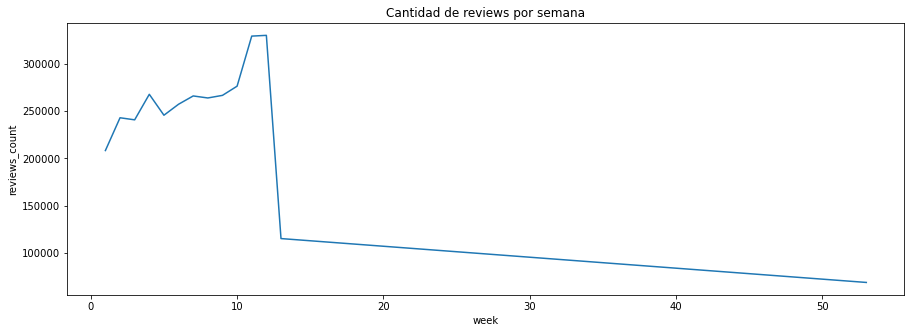

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.lineplot(x=plot_df.week, y=plot_df.reviews_count)
plt.title("Cantidad de reviews por semana")
plt.show()

In [ ]:
datamc.account_id.nunique()

112809

Tenemos 112809 usuarios

In [ ]:
datamc.shape

(3380786, 12)

✅ Separamos en datos de Train y Test

In [ ]:
train = datamc[(datamc.tunein < datetime(year=2021, month=3, day=1))]
train.head()

,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category,Timevisto,Rating,Rating2
0,90627,2021-02-18 22:52:00,2021-02-18 23:35:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,43,1.0,1.0
1,3389,2021-02-27 16:25:00,2021-02-27 17:05:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,40,1.0,1.0
2,3395,2021-02-24 17:24:00,2021-02-24 18:10:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,46,1.0,1.0
3,26042,2021-02-24 21:56:00,2021-02-24 22:44:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,48,1.0,1.0
4,26060,2021-02-19 15:10:00,2021-02-19 15:15:00,1,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,5,0.5,0.0


In [ ]:
train.account_id.nunique()

97627

In [ ]:
test = datamc[(datamc.tunein >= datetime(year=2021, month=3, day=1))]
test.head()

,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category,Timevisto,Rating,Rating2
5,26062,2021-03-09 22:55:00,2021-03-09 23:38:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,43,1.0,1.0
6,26062,2021-03-21 17:56:00,2021-03-21 19:13:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,77,1.0,1.0
7,26065,2021-03-06 01:49:00,2021-03-06 02:31:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,42,1.0,1.0
8,26065,2021-03-07 13:38:00,2021-03-07 14:53:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,75,1.0,1.0
9,26065,2021-03-14 15:49:00,2021-03-14 15:55:00,1,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,6,0.5,0.0


In [ ]:
test.account_id.nunique()

87617

✅ COLD START

In [ ]:
test[~test.account_id.isin(train.account_id.unique())].account_id.nunique()

15182

In [ ]:
users = datamc.account_id.unique()
non_cold_users = train.account_id.unique()

print(len(users), len(non_cold_users))

112809 97627


In [ ]:
group_train = train.groupby(['account_id', 'content_id', 'title']).sum().reset_index() 
group_train.sample(10)

,account_id,content_id,title,resume,run_time_min,Timevisto,Rating,Rating2
722200,57779,176.0,Ep:065 Moisés,0,79.0,80,1.0,1.0
74960,6250,231.0,T:1 Ep:01 Volver al 1 a 1,1,15.0,13,1.0,1.0
155873,12621,3353.0,T:1 Ep:15 Rastros de mentiras,1,132.0,30,1.5,0.0
224170,18149,116.0,T:1 Ep:01 The Undoing,1,54.0,32,1.0,1.0
362624,29638,593.0,Soundgarden Live at Roundhouse - London,0,81.0,40,0.5,0.0
1146479,88125,2485.0,T:1 Ep:16 Gabby Duran: Niñera de aliens,1,50.0,29,1.5,1.0
1148780,88290,2668.0,Novios,0,110.0,6,0.5,0.0
276169,22478,3712.0,T:2 Ep:04 The Fall,1,118.0,109,2.0,2.0
1452844,107375,1944.0,Antes de la medianoche,2,432.0,104,2.5,1.0
1137310,87372,135.0,T:2 Ep:35 Jessie,1,46.0,46,2.0,2.0


In [ ]:
lengt=test.shape[0]
lengt

1318503

In [ ]:
test['Is_Viewed']=0

C:\Users\DELL\AppData\Local\Temp/ipykernel_10008/3852238586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Is_Viewed']=0


In [ ]:
test

,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category,Timevisto,Rating,Rating2,Is_Viewed
5,26062,2021-03-09 22:55:00,2021-03-09 23:38:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,43,1.0,1.0,0
6,26062,2021-03-21 17:56:00,2021-03-21 19:13:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,77,1.0,1.0,0
7,26065,2021-03-06 01:49:00,2021-03-06 02:31:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,42,1.0,1.0,0
8,26065,2021-03-07 13:38:00,2021-03-07 14:53:00,0,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,75,1.0,1.0,0
9,26065,2021-03-14 15:49:00,2021-03-14 15:55:00,1,2040.0,T:5 Ep:08 This is Us,43.0,2021-06-30 23:59:59,Drama/Comedia,6,0.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657765,25102,2021-03-09 23:32:00,2021-03-10 00:02:00,0,1036.0,T:3 Ep:03 Future Man,32.0,2021-06-30 23:59:59,Comedia/Ciencia Ficción,30,1.0,1.0,0
3657774,25640,2021-03-16 00:25:00,2021-03-16 00:28:00,1,86.0,03/12- Bienvenidos a bordo,110.0,2021-04-13 23:59:00,Entretenimiento/Competencia,3,0.5,0.0,0
3657775,25640,2021-03-26 01:11:00,2021-03-26 02:22:00,1,86.0,03/22- Bienvenidos a bordo,107.0,2021-04-19 23:59:00,Entretenimiento/Competencia,71,1.0,1.0,0
3657776,25640,2021-03-27 03:56:00,2021-03-27 05:05:00,1,86.0,03/17- Bienvenidos a bordo,107.0,2021-04-17 23:59:00,Entretenimiento/Competencia,69,1.0,1.0,0


In [ ]:
test.Rating[5]

1.0

In [ ]:
test['Is_Viewed'] = ['SI' if (test.Rating.iloc[i]) == 1 else 'NO' for i in range(lengt)]

C:\Users\DELL\AppData\Local\Temp/ipykernel_10008/4156027277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Is_Viewed'] = ['SI' if (test.Rating.iloc[i]) == 1 else 'NO' for i in range(lengt)]


In [ ]:
test.sample(10)

,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category,Timevisto,Rating,Rating2,Is_Viewed
858687,81375,2021-03-19 21:40:00,2021-03-19 22:32:00,1,4133.0,T:1 Ep:13 El nudo,52.0,2022-03-31 23:59:00,Drama/Romance,52,1.0,1.0,SI
3049522,105655,2021-03-21 15:35:00,2021-03-21 16:16:00,0,876.0,T:4 Ep:78 Dance Moms,41.0,2021-03-31 23:59:00,Reality,41,1.0,1.0,SI
1097320,18206,2021-03-06 21:08:00,2021-03-06 21:12:00,0,4008.0,Past Malice: An Emma Fielding Mystery,87.0,2021-06-30 23:59:00,Suspenso/Crimen,4,0.5,0.0,NO
1753940,71810,2021-03-29 01:23:00,2021-03-29 01:26:00,0,2299.0,T:1 Ep:002 Educando a Nina,55.0,2022-06-30 23:59:00,Comedia/Romance,3,0.5,0.0,NO
2913379,43550,2021-03-18 00:26:00,2021-03-18 00:49:00,0,2180.0,T:2 Ep:14 ICarly,23.0,2021-08-31 23:59:59,Comedia/Infantil,23,1.0,1.0,SI
2194806,72087,2021-03-12 23:42:00,2021-03-12 23:55:00,0,2677.0,Un jefe en pañales,97.0,2022-02-28 23:59:00,Infantil/Animación,13,0.5,0.0,NO
820477,108606,2021-03-06 22:16:00,2021-03-06 23:08:00,0,257.0,Vivir al Límite,131.0,2022-08-21 23:59:00,Drama/Bélico,52,0.5,0.0,NO
1458568,60249,2021-03-09 01:14:00,2021-03-09 02:04:00,1,176.0,Ep:065 Moisés,79.0,2021-03-15 23:59:59,Drama/Romance,50,1.0,1.0,SI
985466,80722,2021-03-18 13:00:00,2021-03-18 13:08:00,0,132.0,T:6 Ep:272 Los Jóvenes Titanes en Acción,11.0,2021-05-28 23:59:00,Infantil/Dibujos Animados,8,1.0,1.0,SI
276382,98388,2021-03-27 02:05:00,2021-03-27 02:57:00,0,4133.0,T:1 Ep:02 El nudo,52.0,2022-03-31 23:59:00,Drama/Romance,52,1.0,1.0,SI


In [ ]:
test2 = test[(test.end_vod_date >= datetime(year=2023, month=2, day=1))]

In [ ]:
test2

,account_id,tunein,tuneout,resume,content_id,title,run_time_min,end_vod_date,category,Timevisto,Rating,Rating2,Is_Viewed
67534,3752,2021-03-10 10:16:00,2021-03-10 10:20:00,0,604.0,T:2 Ep:01 Famoso,4.0,2023-12-04 23:59:00,Comedia,4,1.0,1.0,SI
67537,29350,2021-03-06 11:55:00,2021-03-06 11:59:00,0,604.0,T:2 Ep:01 Famoso,4.0,2023-12-04 23:59:00,Comedia,4,1.0,1.0,SI
67541,30145,2021-03-28 03:40:00,2021-03-28 03:44:00,0,604.0,T:2 Ep:01 Famoso,4.0,2023-12-04 23:59:00,Comedia,4,1.0,1.0,SI
67542,30145,2021-03-31 07:30:00,2021-03-31 07:35:00,0,604.0,T:2 Ep:01 Famoso,4.0,2023-12-04 23:59:00,Comedia,5,1.0,1.0,SI
67546,30596,2021-03-30 00:51:00,2021-03-30 00:55:00,0,604.0,T:2 Ep:01 Famoso,4.0,2023-12-04 23:59:00,Comedia,4,1.0,1.0,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657760,25047,2021-03-10 13:29:00,2021-03-10 13:49:00,1,395.0,T:2 Ep:18 Manijomio: Gaming,55.0,2023-07-30 23:59:00,Entretenimiento/Competencia,20,0.5,0.0,NO
3657761,25047,2021-03-10 15:08:00,2021-03-10 15:22:00,1,395.0,T:2 Ep:19 Manijomio: Gaming,54.0,2023-07-30 23:59:00,Entretenimiento/Competencia,14,0.5,0.0,NO
3657762,25047,2021-03-10 15:24:00,2021-03-10 16:16:00,1,395.0,T:3 Ep:01 Manijomio: Gaming,52.0,2023-07-30 23:59:00,Entretenimiento/Competencia,52,1.0,1.0,SI
3657763,25047,2021-03-10 16:16:00,2021-03-10 17:10:00,0,395.0,T:3 Ep:02 Manijomio: Gaming,54.0,2023-07-30 23:59:00,Entretenimiento/Competencia,54,1.0,1.0,SI


In [ ]:
group_test = test.groupby(['account_id', 'content_id', 'title', 'Is_Viewed']).sum().reset_index() 
group_test.sample(10)

,account_id,content_id,title,Is_Viewed,resume,run_time_min,Timevisto,Rating,Rating2
310769,36265,1451.0,Supernova,NO,0,78.0,5,0.5,0.0
266587,31282,3945.0,Jurassic Park: El mundo perdido,NO,0,122.0,5,0.5,0.0
775386,86422,558.0,T:1 Ep:10 Junior Express,SI,0,24.0,25,1.0,1.0
254464,29755,2799.0,Moulin Rouge,NO,1,127.0,4,0.5,0.0
732816,81983,3983.0,Inocencia,SI,1,101.0,100,1.0,1.0
779149,86891,2190.0,T:2 Ep:06 Unforgotten,SI,0,45.0,49,1.0,1.0
965846,105735,1020.0,02/24 - MasterChef - Celebrity,SI,0,85.0,83,1.0,1.0
458665,53358,2941.0,Open Season,NO,1,86.0,13,0.5,0.0
277087,32506,2942.0,T:3 Ep:13 The Outpost,NO,0,42.0,17,0.5,0.0
74502,8709,2910.0,Búsqueda implacable 3,SI,1,104.0,59,1.0,1.0


In [ ]:
group_test2 = test2.groupby(['account_id', 'content_id', 'title', 'Is_Viewed']).sum().reset_index() 
group_test2.sample(10)

,account_id,content_id,title,Is_Viewed,resume,run_time_min,Timevisto,Rating,Rating2
90436,101298,2098.0,T:1 Ep:02 Aquí en la Tierra,NO,1,52.0,14,0.5,0.0
58293,70381,2153.0,T:1 Ep:03 Otros Pecados,NO,1,50.0,11,0.5,0.0
55851,67704,2077.0,Ep:04 Simona,SI,0,52.0,57,1.0,1.0
8498,11947,2012.0,T:8 Ep:01 Game of Thrones,SI,0,53.0,52,1.0,1.0
14648,20162,1847.0,Viudas,SI,1,103.0,56,1.0,1.0
63583,75519,1573.0,T:5 Ep:02 The Walking Dead,SI,0,43.0,41,1.0,1.0
37717,48498,4247.0,Deuda,SI,1,91.0,78,1.0,1.0
29327,38455,1582.0,T:2 Ep:10 Alerta Aeropuerto,NO,0,44.0,4,0.5,0.0
105238,111460,2120.0,T:1 Ep:03 El Lobista,NO,0,47.0,3,0.5,0.0
64222,76026,1573.0,T:9 Ep:02 The Walking Dead,NO,1,44.0,14,0.5,0.0


✅ Matriz de interacciones

In [ ]:
matrix_columns = ["account_id", "content_id", "Rating"]

In [ ]:
matrix_columns2 = ["account_id", "content_id", "Rating2"]

In [ ]:
interactions = group_train[matrix_columns]
interactions.head()

,account_id,content_id,Rating
0,0,1503.0,1.0
1,0,2866.0,1.0
2,0,3438.0,1.0
3,0,3498.0,0.5
4,0,3845.0,1.0


In [ ]:
interactions2 = group_train[matrix_columns2]
interactions2.head()

,account_id,content_id,Rating2
0,0,1503.0,1.0
1,0,2866.0,1.0
2,0,3438.0,1.0
3,0,3498.0,0.0
4,0,3845.0,1.0


In [ ]:
interactions_matrix = interactions.pivot_table(index="account_id", columns="content_id", values="Rating")

In [ ]:
interactions_matrix2 = interactions2.pivot_table(index="account_id", columns="content_id", values="Rating2")

In [ ]:
interactions_matrix.head()

content_id,0.0,1.0,3.0,6.0,7.0,8.0,9.0,11.0,12.0,13.0,...,4357.0,4358.0,4359.0,4360.0,4361.0,4362.0,4363.0,4364.0,4365.0,4366.0
account_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_movie_interaction = interactions_matrix.fillna(0)

In [ ]:
user_movie_interaction2 = interactions_matrix2.fillna(0)

In [ ]:
#user_movie_interaction = pd.pivot_table(group_train, index='account_id', columns='content_id', values='Rating')
user_movie_interaction.head()

content_id,0.0,1.0,3.0,6.0,7.0,8.0,9.0,11.0,12.0,13.0,...,4357.0,4358.0,4359.0,4360.0,4361.0,4362.0,4363.0,4364.0,4365.0,4366.0
account_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_movie_interaction.shape

(97627, 3041)

In [ ]:
user_movie_interaction2.shape

(97627, 3041)

✅ Convertimos a csr matrix:

In [ ]:
from scipy.sparse import csr_matrix

c:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
user_movie_interaction_csr = csr_matrix(user_movie_interaction.values)

In [ ]:
user_movie_interaction_csr2 = csr_matrix(user_movie_interaction2.values)

✅ Diccionario para futura referencia:

In [ ]:
user_id = list(user_movie_interaction.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1

In [ ]:
user_id2 = list(user_movie_interaction2.index)
user_dict2 = {}
counter = 0 
for i in user_id2:
    user_dict2[i] = counter
    counter += 1

In [ ]:
item_id = list(user_movie_interaction.columns)
item_dict = {}
counter = 0 
for i in item_id:
    item_dict[i] = counter
    counter += 1

In [ ]:
item_id2 = list(user_movie_interaction2.columns)
item_dict2 = {}
counter = 0 
for i in item_id2:
    item_dict2[i] = counter
    counter += 1

In [ ]:
user_dict

{0: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 10: 8,
 11: 9,
 12: 10,
 13: 11,
 14: 12,
 15: 13,
 16: 14,
 17: 15,
 18: 16,
 19: 17,
 20: 18,
 22: 19,
 23: 20,
 24: 21,
 25: 22,
 27: 23,
 28: 24,
 30: 25,
 31: 26,
 32: 27,
 33: 28,
 34: 29,
 35: 30,
 36: 31,
 37: 32,
 38: 33,
 39: 34,
 40: 35,
 41: 36,
 42: 37,
 44: 38,
 45: 39,
 46: 40,
 47: 41,
 49: 42,
 51: 43,
 52: 44,
 53: 45,
 54: 46,
 55: 47,
 56: 48,
 58: 49,
 59: 50,
 60: 51,
 61: 52,
 62: 53,
 63: 54,
 64: 55,
 65: 56,
 66: 57,
 67: 58,
 69: 59,
 70: 60,
 71: 61,
 72: 62,
 73: 63,
 74: 64,
 75: 65,
 76: 66,
 78: 67,
 79: 68,
 80: 69,
 81: 70,
 82: 71,
 83: 72,
 85: 73,
 87: 74,
 88: 75,
 89: 76,
 90: 77,
 91: 78,
 92: 79,
 93: 80,
 94: 81,
 95: 82,
 96: 83,
 97: 84,
 98: 85,
 101: 86,
 102: 87,
 103: 88,
 104: 89,
 105: 90,
 106: 91,
 107: 92,
 108: 93,
 109: 94,
 110: 95,
 111: 96,
 112: 97,
 113: 98,
 114: 99,
 115: 100,
 116: 101,
 117: 102,
 118: 103,
 119: 104,
 120: 105,
 121: 106,
 122: 107,
 123: 108,
 125:

✅ Modelos:

In [ ]:
from lightfm import LightFM

c:\Users\DELL\anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [ ]:
model = LightFM(random_state=0,
                loss='warp',
                learning_rate=0.03,
                no_components=100)

model = model.fit(user_movie_interaction_csr,
                  epochs=100,
                  num_threads=16, verbose=False)

In [ ]:
model_2 = LightFM(random_state=0,
                loss='warp',
                learning_rate=0.03,
                no_components=100)

model_2 = model_2.fit(user_movie_interaction_csr2,
                  epochs=100,
                  num_threads=16, verbose=False)

In [ ]:
TEST_PERCENTAGE = 0.25
# model learning rate
LEARNING_RATE = 0.25
# no of latent factors
NO_COMPONENTS = 20
# no of epochs to fit model
NO_EPOCHS = 20
# no of threads to fit model
NO_THREADS = 32
# regularisation for both user and item features
ITEM_ALPHA = 1e-6
USER_ALPHA = 1e-6

# seed for pseudonumber generations
SEED = 42

In [ ]:
model2 = LightFM(loss='warp', no_components=NO_COMPONENTS, 
                 learning_rate=LEARNING_RATE, 
                 item_alpha=ITEM_ALPHA,
                 user_alpha=USER_ALPHA,
                 random_state=np.random.RandomState(SEED)
                )

model2.fit(interactions=user_movie_interaction_csr,
          epochs=NO_EPOCHS)

In [ ]:
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import auc_score

In [ ]:
alpha = 1e-3
epochs = 70

adagrad_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adagrad',
                        user_alpha=alpha,
                        item_alpha=alpha)
adadelta_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adadelta',
                        user_alpha=alpha,
                        item_alpha=alpha)



In [ ]:
for epoch in range(epochs):
    adagrad_model.fit_partial(user_movie_interaction_csr, epochs=1)

In [ ]:
for epoch in range(epochs):
    adadelta_model.fit_partial(user_movie_interaction_csr, epochs=1)

In [ ]:
def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30,n_jobs = 4):
    '''
    Function to run matrix-factorization algorithm
    Required Input -
        - interactions = dataset create by create_interaction_matrix
        - n_components = number of embeddings you want to create to define Item and user
        - loss = loss function other options are logistic, brp
        - epoch = number of epochs to run 
        - n_jobs = number of cores used for execution 
    Expected Output  -
        Model - Trained model
    '''
    
    #uncommented for train test split
#     x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components= n_components, loss=loss,k=k)
    model.fit(x,epochs=epoch,num_threads = n_jobs)
    return model

In [ ]:
from scipy import sparse

In [ ]:
x = sparse.csr_matrix(user_movie_interaction.values)

In [ ]:
mf_model = runMF(interactions = user_movie_interaction_csr,
                 n_components = 30,
                 loss = 'warp',
                 k = 20,
                 epoch = 30,
                 n_jobs = 4)

Definimos la funcion para obtener 20 recomendaciones para un usuario en específico:

In [ ]:
import numpy as np

In [ ]:
def recomm(model, interactions, user_id, user_dict, item_dict, nrec_items = 20, show = True):

    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]

    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                [interactions.loc[user_id,:] > 0].index).sort_values(ascending=False))
    
    #Filtro de items que ya leyó el usuario
    scores = [x for x in scores if x not in known_items]
    recomms = scores[0:nrec_items]

    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + str(i))
            counter+=1

        print("\n Recommended Items:")
        
        counter = 1
        for i in recomms:
            print(str(counter) + '- ' + str(i))
            counter+=1
    return recomms

Prueba de la función para un usuario al azar. 

In [ ]:
recomms_test = recomm(model, user_movie_interaction, 2, user_dict, item_dict, show=True)

User: 2
Known Likes:
1- 1582.0
2- 557.0
3- 6.0

 Recommended Items:
1- 3716.0
2- 2040.0
3- 2012.0
4- 1957.0
5- 3775.0
6- 2541.0
7- 1573.0
8- 3900.0
9- 2402.0
10- 2091.0
11- 20.0
12- 3084.0
13- 2546.0
14- 569.0
15- 3740.0
16- 3166.0
17- 3377.0
18- 1495.0
19- 3292.0
20- 453.0


In [ ]:
metadato.loc[metadato.content_id.isin(recomms_test), "title"]

21          T:2 Ep:73 Puppy Dog Pals
262         T:1 Ep:15 Puppy Dog Pals
278         T:1 Ep:37 Puppy Dog Pals
279         T:1 Ep:38 Puppy Dog Pals
300         T:2 Ep:75 Puppy Dog Pals
                    ...             
32923             T:2 Ep:07 Batwoman
32934    T:10 Ep:21 The Walking Dead
33093      T:2 Ep:102 Puppy Dog Pals
33094       T:2 Ep:95 Puppy Dog Pals
33142             T:2 Ep:05 Batwoman
Name: title, Length: 611, dtype: object

Los contenidos que recomienden, no tienen que haber sido vistos previamente por los usuarios (filtrar).

In [ ]:
from tqdm import tqdm

Popularidad

In [ ]:
popularity_df = group_train.groupby("content_id", as_index=False).agg({"account_id":"nunique"}).sort_values(by="account_id", ascending=False)

popularity_df.columns=["content_id", "popularity"]
popularity_df.head()

,content_id,popularity
1083,2040.0,11481
2828,3806.0,8762
2922,3900.0,7960
2624,3598.0,3772
1201,2160.0,3506


In [ ]:
popular_content = popularity_df.content_id.values[:20]

In [ ]:

#definimos dict donde vamos a ir almacenando las recomendaciones
recomms_dict = {
    'user_id': [],
    'recomms': [],
    'cold': []
}

#obtenemos cantidad de usuarios y cantidad de items
n_users, n_items = user_movie_interaction.shape
item_ids = np.arange(n_items)

#por cada usuario del dataset de test, generamos recomendaciones
for user in tqdm(group_test.account_id.unique()):
    # Validar si el usuario se encuentra en la matriz de interacciones (interactions_matrix.index)
    if user in list(user_movie_interaction.index):
      # Si el usuario esta en train, no es cold start. Usamos el modelo para recomendar
      user_x = user_dict[user] #buscamos el indice del usuario en la matriz (transformamos id a indice)

      # Generar las predicciones para el usuario x
      preds = model.predict(user_ids=user_x, item_ids = item_ids)

      # Basándose en el ejemplo anterior, ordenar las predicciones de menor a mayor y quedarse con 50.
      scores = pd.Series(preds)
      scores.index = user_movie_interaction.columns
      scores = list(pd.Series(scores.sort_values(ascending=False).index))[:50]

      #COMPLETAR: Obtener listado de contenidos vistos anteriormente por el usuario (en el set de train)
      watched_contents = group_train[group_train.account_id == user].content_id.unique()

      #COMPLETAR: Filtrar contenidos ya vistos y quedarse con los primeros 20
      recomms = [x for x in scores if x not in watched_contents][:20]

      # Guardamos las recomendaciones en el diccionario
      recomms_dict['user_id'].append(user)
      recomms_dict['recomms'].append(scores)
      recomms_dict["cold"].append(False) #Para luego tener identificados a los usuarios cold
    
    # En este else trataremos a los usuarios que no están en la matriz (cold start)
    else:
      recomms_dict['user_id'].append(user)
      # Les recomendamos contenido popular
      recomms_dict['recomms'].append(popular_content)
      recomms_dict["cold"].append(True) #Para luego tener identificados a los usuarios cold



100%|██████████| 48691/48691 [26:39<00:00, 30.44it/s]


Model2

In [ ]:
#definimos dict donde vamos a ir almacenando las recomendaciones
recomms_dict2 = {
    'user_id': [],
    'recomms': [],
    'cold': []
}

#obtenemos cantidad de usuarios y cantidad de items
n_users, n_items = user_movie_interaction.shape
item_ids = np.arange(n_items)

#por cada usuario del dataset de test, generamos recomendaciones
for user in tqdm(group_test.account_id.unique()):
    # Validar si el usuario se encuentra en la matriz de interacciones (interactions_matrix.index)
    if user in list(user_movie_interaction.index):
      # Si el usuario esta en train, no es cold start. Usamos el modelo para recomendar
      user_x = user_dict[user] #buscamos el indice del usuario en la matriz (transformamos id a indice)

      # Generar las predicciones para el usuario x
      preds = model2.predict(user_ids=user_x, item_ids = item_ids)

      # Basándose en el ejemplo anterior, ordenar las predicciones de menor a mayor y quedarse con 50.
      scores = pd.Series(preds)
      scores.index = user_movie_interaction.columns
      scores = list(pd.Series(scores.sort_values(ascending=False).index))[:50]

      #COMPLETAR: Obtener listado de contenidos vistos anteriormente por el usuario (en el set de train)
      watched_contents = group_train[group_train.account_id == user].content_id.unique()

      #COMPLETAR: Filtrar contenidos ya vistos y quedarse con los primeros 20
      recomms = [x for x in scores if x not in watched_contents][:20]

      # Guardamos las recomendaciones en el diccionario
      recomms_dict2['user_id'].append(user)
      recomms_dict2['recomms'].append(scores)
      recomms_dict2["cold"].append(False) #Para luego tener identificados a los usuarios cold
    
    # En este else trataremos a los usuarios que no están en la matriz (cold start)
    else:
      recomms_dict2['user_id'].append(user)
      # Les recomendamos contenido popular
      recomms_dict2['recomms'].append(popular_content)
      recomms_dict2["cold"].append(True) #Para luego tener identificados a los usuarios cold


100%|██████████| 48691/48691 [26:02<00:00, 31.17it/s]  


adagrad_model

In [ ]:
#definimos dict donde vamos a ir almacenando las recomendaciones
recomms_dict3 = {
    'user_id': [],
    'recomms': [],
    'cold': []
}

#obtenemos cantidad de usuarios y cantidad de items
n_users, n_items = user_movie_interaction.shape
item_ids = np.arange(n_items)

#por cada usuario del dataset de test, generamos recomendaciones
for user in tqdm(group_test.account_id.unique()):
    # Validar si el usuario se encuentra en la matriz de interacciones (interactions_matrix.index)
    if user in list(user_movie_interaction.index):
      # Si el usuario esta en train, no es cold start. Usamos el modelo para recomendar
      user_x = user_dict[user] #buscamos el indice del usuario en la matriz (transformamos id a indice)

      # Generar las predicciones para el usuario x
      preds = adagrad_model.predict(user_ids=user_x, item_ids = item_ids)

      # Basándose en el ejemplo anterior, ordenar las predicciones de menor a mayor y quedarse con 50.
      scores = pd.Series(preds)
      scores.index = user_movie_interaction.columns
      scores = list(pd.Series(scores.sort_values(ascending=False).index))[:50]

      #COMPLETAR: Obtener listado de contenidos vistos anteriormente por el usuario (en el set de train)
      watched_contents = group_train[group_train.account_id == user].content_id.unique()

      #COMPLETAR: Filtrar contenidos ya vistos y quedarse con los primeros 20
      recomms = [x for x in scores if x not in watched_contents][:20]

      # Guardamos las recomendaciones en el diccionario
      recomms_dict3['user_id'].append(user)
      recomms_dict3['recomms'].append(scores)
      recomms_dict3["cold"].append(False) #Para luego tener identificados a los usuarios cold
    
    # En este else trataremos a los usuarios que no están en la matriz (cold start)
    else:
      recomms_dict3['user_id'].append(user)
      # Les recomendamos contenido popular
      recomms_dict3['recomms'].append(popular_content)
      recomms_dict3["cold"].append(True) #Para luego tener identificados a los usuarios cold

100%|██████████| 87617/87617 [54:57<00:00, 26.57it/s]  


adadelta_model

In [ ]:
#definimos dict donde vamos a ir almacenando las recomendaciones
recomms_dict4 = {
    'user_id': [],
    'recomms': [],
    'cold': []
}

#obtenemos cantidad de usuarios y cantidad de items
n_users, n_items = user_movie_interaction.shape
item_ids = np.arange(n_items)

#por cada usuario del dataset de test, generamos recomendaciones
for user in tqdm(group_test.account_id.unique()):
    # Validar si el usuario se encuentra en la matriz de interacciones (interactions_matrix.index)
    if user in list(user_movie_interaction.index):
      # Si el usuario esta en train, no es cold start. Usamos el modelo para recomendar
      user_x = user_dict[user] #buscamos el indice del usuario en la matriz (transformamos id a indice)

      # Generar las predicciones para el usuario x
      preds = adadelta_model.predict(user_ids=user_x, item_ids = item_ids)

      # Basándose en el ejemplo anterior, ordenar las predicciones de menor a mayor y quedarse con 50.
      scores = pd.Series(preds)
      scores.index = user_movie_interaction.columns
      scores = list(pd.Series(scores.sort_values(ascending=False).index))[:50]

      #COMPLETAR: Obtener listado de contenidos vistos anteriormente por el usuario (en el set de train)
      watched_contents = group_train[group_train.account_id == user].content_id.unique()

      #COMPLETAR: Filtrar contenidos ya vistos y quedarse con los primeros 20
      recomms = [x for x in scores if x not in watched_contents][:20]

      # Guardamos las recomendaciones en el diccionario
      recomms_dict4['user_id'].append(user)
      recomms_dict4['recomms'].append(scores)
      recomms_dict4["cold"].append(False) #Para luego tener identificados a los usuarios cold
    
    # En este else trataremos a los usuarios que no están en la matriz (cold start)
    else:
      recomms_dict4['user_id'].append(user)
      # Les recomendamos contenido popular
      recomms_dict4['recomms'].append(popular_content)
      recomms_dict4["cold"].append(True) #Para luego tener identificados a los usuarios cold

100%|██████████| 87617/87617 [48:04<00:00, 30.38it/s]  


mf_model

In [ ]:
recomms_dict5 = {
    'user_id': [],
    'recomms': [],
    'cold': []
}

#obtenemos cantidad de usuarios y cantidad de items
n_users, n_items = user_movie_interaction.shape
item_ids = np.arange(n_items)

#por cada usuario del dataset de test, generamos recomendaciones
for user in tqdm(group_test.account_id.unique()):
    # Validar si el usuario se encuentra en la matriz de interacciones (interactions_matrix.index)
    if user in list(user_movie_interaction.index):
      # Si el usuario esta en train, no es cold start. Usamos el modelo para recomendar
      user_x = user_dict[user] #buscamos el indice del usuario en la matriz (transformamos id a indice)

      # Generar las predicciones para el usuario x
      preds = mf_model.predict(user_ids=user_x, item_ids = item_ids)

      # Basándose en el ejemplo anterior, ordenar las predicciones de menor a mayor y quedarse con 50.
      scores = pd.Series(preds)
      scores.index = user_movie_interaction.columns
      scores = list(pd.Series(scores.sort_values(ascending=False).index))[:50]

      #COMPLETAR: Obtener listado de contenidos vistos anteriormente por el usuario (en el set de train)
      watched_contents = group_train[group_train.account_id == user].content_id.unique()

      #COMPLETAR: Filtrar contenidos ya vistos y quedarse con los primeros 20
      recomms = [x for x in scores if x not in watched_contents][:20]

      # Guardamos las recomendaciones en el diccionario
      recomms_dict5['user_id'].append(user)
      recomms_dict5['recomms'].append(scores)
      recomms_dict5["cold"].append(False) #Para luego tener identificados a los usuarios cold
    
    # En este else trataremos a los usuarios que no están en la matriz (cold start)
    else:
      recomms_dict5['user_id'].append(user)
      # Les recomendamos contenido popular
      recomms_dict5['recomms'].append(popular_content)
      recomms_dict5["cold"].append(True) #Para luego tener identificados a los usuarios cold

100%|██████████| 87617/87617 [50:04<00:00, 29.16it/s]   


Modelo 1 pero con 0 y 1

In [ ]:
recomms_dict_2 = {
    'user_id': [],
    'recomms': [],
    'cold': []
}

#obtenemos cantidad de usuarios y cantidad de items
n_users, n_items = user_movie_interaction2.shape
item_ids = np.arange(n_items)

#por cada usuario del dataset de test, generamos recomendaciones
for user in tqdm(group_test.account_id.unique()):
    # Validar si el usuario se encuentra en la matriz de interacciones (interactions_matrix.index)
    if user in list(user_movie_interaction2.index):
      # Si el usuario esta en train, no es cold start. Usamos el modelo para recomendar
      user_x = user_dict2[user] #buscamos el indice del usuario en la matriz (transformamos id a indice)

      # Generar las predicciones para el usuario x
      preds = model_2.predict(user_ids=user_x, item_ids = item_ids)

      # Basándose en el ejemplo anterior, ordenar las predicciones de menor a mayor y quedarse con 50.
      scores = pd.Series(preds)
      scores.index = user_movie_interaction2.columns
      scores = list(pd.Series(scores.sort_values(ascending=False).index))[:50]

      #COMPLETAR: Obtener listado de contenidos vistos anteriormente por el usuario (en el set de train)
      watched_contents = group_train[group_train.account_id == user].content_id.unique()

      #COMPLETAR: Filtrar contenidos ya vistos y quedarse con los primeros 20
      recomms = [x for x in scores if x not in watched_contents][:20]

      # Guardamos las recomendaciones en el diccionario
      recomms_dict_2['user_id'].append(user)
      recomms_dict_2['recomms'].append(scores)
      recomms_dict_2["cold"].append(False) #Para luego tener identificados a los usuarios cold
    
    # En este else trataremos a los usuarios que no están en la matriz (cold start)
    else:
      recomms_dict_2['user_id'].append(user)
      # Les recomendamos contenido popular
      recomms_dict_2['recomms'].append(popular_content)
      recomms_dict_2["cold"].append(True) #Para luego tener identificados a los usuarios cold

100%|██████████| 87617/87617 [48:38<00:00, 30.03it/s]  


Convertimos el dict a dataframe:

In [ ]:
recomms_df = pd.DataFrame(recomms_dict)
recomms_df

,user_id,recomms,cold
0,2,"[557.0, 1582.0, 6.0, 3716.0, 2040.0, 2012.0, 1...",False
1,3,"[1495.0, 2815.0, 3755.0, 1410.0, 2216.0, 3825....",False
2,4,"[1008.0, 1822.0, 2160.0, 4352.0, 4335.0, 2178....",False
3,5,"[3550.0, 1316.0, 2160.0, 304.0, 607.0, 3900.0,...",False
4,6,"[3326.0, 3752.0, 724.0, 2805.0, 729.0, 6.0, 37...",False
...,...,...,...
48686,113872,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
48687,113873,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
48688,113875,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
48689,113877,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True


In [ ]:
recomms_df.user_id.nunique()

48691

In [ ]:
recomms_df.cold.value_counts()

False    41236
True      7455
Name: cold, dtype: int64

Model2

In [ ]:
recomms_df2 = pd.DataFrame(recomms_dict2)
recomms_df2

,user_id,recomms,cold
0,2,"[2312.0, 2709.0, 2890.0, 3584.0, 2300.0, 226.0...",False
1,3,"[2312.0, 1881.0, 2410.0, 178.0, 2709.0, 542.0,...",False
2,4,"[3601.0, 2312.0, 3799.0, 459.0, 1044.0, 3679.0...",False
3,5,"[1041.0, 613.0, 3799.0, 1044.0, 655.0, 2457.0,...",False
4,6,"[1041.0, 655.0, 1842.0, 2474.0, 2952.0, 2666.0...",False
...,...,...,...
48686,113872,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
48687,113873,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
48688,113875,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
48689,113877,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True


Listado "ideal" contra el que vamos a comparar nuestras recomendaciones.

In [ ]:
ideal_recomms = group_test[group_test.Is_Viewed== 'SI']\
                  .sort_values(by=["account_id", "Rating"], ascending=False)\
                  .groupby(["account_id"], as_index=False)\
                  .agg({"content_id": "unique"})\
                  .head()
ideal_recomms.head()

,account_id,content_id
0,2,[433.0]
1,3,"[563.0, 3702.0, 3980.0, 280.0, 461.0, 1949.0, ..."
2,4,"[513.0, 565.0, 2212.0]"
3,6,"[2900.0, 3211.0, 4065.0]"
4,7,[315.0]


Unión en un mismo dataframe las recomendaciones nuestras con el set ideal.

In [ ]:
df_map = ideal_recomms.merge(recomms_df, how="left", left_on="account_id", right_on="user_id")[["account_id", "content_id", "recomms"]]
df_map.columns = ["account_id", "ideal", "recomms"]
df_map.head()

,account_id,ideal,recomms
0,2,[433.0],"[557.0, 1582.0, 6.0, 3716.0, 2040.0, 2012.0, 1..."
1,3,"[563.0, 280.0]","[1495.0, 2815.0, 3755.0, 1410.0, 2216.0, 3825...."
2,4,"[513.0, 2212.0]","[1008.0, 1822.0, 2160.0, 4352.0, 4335.0, 2178...."
3,10,[2091.0],"[1943.0, 2091.0, 3900.0, 3806.0, 2040.0, 3550...."
4,13,[38.0],"[135.0, 3414.0, 3364.0, 53.0, 1962.0, 2485.0, ..."


In [ ]:
aps = [] # lista vacía para ir almacenando la AP de cada recomendación
for pred, label in df_map[["ideal", "recomms"]].values:
    print(pred, label)
    n = len(pred) # cantidad de elementos recomendados
    print(f'n = {n}')
    arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
    rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
    print(f'ítems relevantes = {rel_k}')
    tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
    print(f'contador de verdaderos positivos = {tp}')
    denom = arange[rel_k] # posiciones donde se encuentran los ítems relantes
    print(f'posiciones de los ítems relevantes = {denom}')
    print(f"P(k) a promediar = {[f'{x}/{int(y)}' for (x,y) in zip(tp, denom)]}")
    ap = (tp / denom).sum() / len(label) # average precision
    print(f'average precision = {round(ap, 3)}')
    aps.append(ap)
    print('\n')

[433.] [557.0, 1582.0, 6.0, 3716.0, 2040.0, 2012.0, 1957.0, 3775.0, 2541.0, 1573.0, 3900.0, 2402.0, 2091.0, 20.0, 3084.0, 2546.0, 569.0, 3740.0, 3166.0, 3377.0, 1495.0, 3292.0, 453.0, 3711.0, 1008.0, 1971.0, 3749.0, 1139.0, 1539.0, 3618.0, 2056.0, 2314.0, 116.0, 558.0, 3806.0, 1794.0, 712.0, 392.0, 154.0, 3863.0, 1998.0, 1910.0, 55.0, 1468.0, 18.0, 2810.0, 2334.0, 2202.0, 2920.0, 2307.0]
n = 1
ítems relevantes = [False]
contador de verdaderos positivos = []
posiciones de los ítems relevantes = []
P(k) a promediar = []
average precision = 0.0


[563. 280.] [1495.0, 2815.0, 3755.0, 1410.0, 2216.0, 3825.0, 3769.0, 825.0, 3206.0, 2809.0, 766.0, 2230.0, 2323.0, 2012.0, 3790.0, 842.0, 2810.0, 2967.0, 3116.0, 1485.0, 3900.0, 2183.0, 2344.0, 2001.0, 3893.0, 1883.0, 240.0, 260.0, 2615.0, 3020.0, 403.0, 531.0, 2249.0, 3839.0, 2909.0, 2353.0, 2235.0, 2259.0, 2910.0, 3826.0, 2234.0, 2942.0, 492.0, 518.0, 3278.0, 2240.0, 2939.0, 3364.0, 347.0, 3032.0]
n = 2
ítems relevantes = [False False]
contador

In [ ]:
MAP = np.mean(aps)
print(f'mean average precision = {round(MAP, 15)}')

mean average precision = 0.004


Model2

In [ ]:
df_map2 = ideal_recomms.merge(recomms_df2, how="left", left_on="account_id", right_on="user_id")[["account_id", "content_id", "recomms"]]
df_map2.columns = ["account_id", "ideal", "recomms"]
df_map2.head()

,account_id,ideal,recomms
0,2,[433.0],"[2312.0, 2709.0, 2890.0, 3584.0, 2300.0, 226.0..."
1,3,"[563.0, 280.0]","[2312.0, 1881.0, 2410.0, 178.0, 2709.0, 542.0,..."
2,4,"[513.0, 2212.0]","[3601.0, 2312.0, 3799.0, 459.0, 1044.0, 3679.0..."
3,10,[2091.0],"[655.0, 1881.0, 2410.0, 1842.0, 542.0, 264.0, ..."
4,13,[38.0],"[613.0, 1907.0, 3584.0, 226.0, 1093.0, 684.0, ..."


In [ ]:
aps2 = [] # lista vacía para ir almacenando la AP de cada recomendación
for pred, label in df_map2[["ideal", "recomms"]].values:
    print(pred, label)
    n = len(pred) # cantidad de elementos recomendados
    print(f'n = {n}')
    arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
    rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
    print(f'ítems relevantes = {rel_k}')
    tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
    print(f'contador de verdaderos positivos = {tp}')
    denom = arange[rel_k] # posiciones donde se encuentran los ítems relantes
    print(f'posiciones de los ítems relevantes = {denom}')
    print(f"P(k) a promediar = {[f'{x}/{int(y)}' for (x,y) in zip(tp, denom)]}")
    ap = (tp / denom).sum() / len(label) # average precision
    print(f'average precision = {round(ap, 3)}')
    aps2.append(ap)
    print('\n')

[433.] [2312.0, 2709.0, 2890.0, 3584.0, 2300.0, 226.0, 2951.0, 463.0, 1842.0, 1841.0, 1907.0, 3164.0, 1041.0, 3508.0, 3162.0, 3799.0, 3958.0, 2463.0, 3180.0, 2350.0, 2084.0, 2447.0, 2474.0, 2076.0, 2168.0, 2743.0, 1909.0, 150.0, 965.0, 3375.0, 3259.0, 2381.0, 3890.0, 3587.0, 684.0, 2575.0, 1814.0, 3967.0, 893.0, 2533.0, 2751.0, 655.0, 3558.0, 723.0, 2410.0, 261.0, 3281.0, 620.0, 3244.0, 3644.0]
n = 1
ítems relevantes = [False]
contador de verdaderos positivos = []
posiciones de los ítems relevantes = []
P(k) a promediar = []
average precision = 0.0


[563. 280.] [2312.0, 1881.0, 2410.0, 178.0, 2709.0, 542.0, 2951.0, 1093.0, 226.0, 569.0, 3200.0, 2890.0, 2943.0, 2078.0, 26.0, 3375.0, 2649.0, 3900.0, 1907.0, 2040.0, 2593.0, 3442.0, 2432.0, 3806.0, 1519.0, 3281.0, 2359.0, 2091.0, 1720.0, 1140.0, 576.0, 3711.0, 2627.0, 3210.0, 3382.0, 3381.0, 378.0, 554.0, 219.0, 3726.0, 3480.0, 1877.0, 1971.0, 529.0, 3690.0, 724.0, 232.0, 3598.0, 2827.0, 6.0]
n = 2
ítems relevantes = [False False]
contado

In [ ]:
MAP2 = np.mean(aps2)
print(f'mean average precision = {round(MAP2, 10)}')

mean average precision = 0.004


adagrad_model

In [ ]:
recomms_df3 = pd.DataFrame(recomms_dict3)
recomms_df3

,user_id,recomms,cold
0,2,"[2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160....",False
1,3,"[2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160....",False
2,4,"[2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160....",False
3,5,"[2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160....",False
4,6,"[2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160....",False
...,...,...,...
87612,113876,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87613,113877,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87614,113878,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87615,113879,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True


In [ ]:
df_map3 = ideal_recomms.merge(recomms_df3, how="left", left_on="account_id", right_on="user_id")[["account_id", "content_id", "recomms"]]
df_map3.columns = ["account_id", "ideal", "recomms"]
df_map3.head()

,account_id,ideal,recomms
0,2,[433.0],"[2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160...."
1,3,"[563.0, 280.0]","[2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160...."
2,4,"[513.0, 2212.0]","[2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160...."
3,10,[2091.0],"[2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160...."
4,13,[38.0],"[2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160...."


In [ ]:
aps3 = [] # lista vacía para ir almacenando la AP de cada recomendación
for pred, label in df_map3[["ideal", "recomms"]].values:
    print(pred, label)
    n = len(pred) # cantidad de elementos recomendados
    print(f'n = {n}')
    arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
    rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
    print(f'ítems relevantes = {rel_k}')
    tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
    print(f'contador de verdaderos positivos = {tp}')
    denom = arange[rel_k] # posiciones donde se encuentran los ítems relantes
    print(f'posiciones de los ítems relevantes = {denom}')
    print(f"P(k) a promediar = {[f'{x}/{int(y)}' for (x,y) in zip(tp, denom)]}")
    ap = (tp / denom).sum() / len(label) # average precision
    print(f'average precision = {round(ap, 3)}')
    aps3.append(ap)
    print('\n')

[433.] [2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160.0, 3690.0, 3210.0, 3550.0, 3384.0, 3711.0, 2627.0, 3382.0, 3775.0, 116.0, 3716.0, 1316.0, 3712.0, 2827.0, 2942.0, 724.0, 1462.0, 2815.0, 580.0, 1971.0, 1008.0, 3863.0, 1139.0, 3726.0, 2972.0, 3035.0, 3578.0, 2992.0, 173.0, 3026.0, 2012.0, 1877.0, 3572.0, 2323.0, 558.0, 729.0, 3292.0, 1140.0, 292.0, 3502.0, 2817.0, 1800.0, 604.0, 718.0, 3091.0]
n = 1
ítems relevantes = [False]
contador de verdaderos positivos = []
posiciones de los ítems relevantes = []
P(k) a promediar = []
average precision = 0.0


[563. 280.] [2040.0, 3806.0, 3900.0, 3598.0, 3381.0, 2160.0, 3690.0, 3210.0, 3550.0, 3384.0, 3711.0, 2627.0, 3382.0, 3775.0, 116.0, 3716.0, 1316.0, 3712.0, 2827.0, 2942.0, 724.0, 1462.0, 2815.0, 580.0, 1971.0, 1008.0, 3863.0, 1139.0, 3726.0, 2972.0, 3035.0, 3578.0, 2992.0, 173.0, 3026.0, 2012.0, 1877.0, 3572.0, 2323.0, 558.0, 729.0, 3292.0, 1140.0, 292.0, 3502.0, 2817.0, 1800.0, 604.0, 718.0, 3091.0]
n = 2
ítems relevantes = [False False]

In [ ]:
MAP3 = np.mean(aps3)
print(f'mean average precision = {round(MAP3, 20)}')

mean average precision = 0.0


adadelta_model

In [ ]:
recomms_df4 = pd.DataFrame(recomms_dict4)
recomms_df4

,user_id,recomms,cold
0,2,"[2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900....",False
1,3,"[2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900....",False
2,4,"[2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900....",False
3,5,"[2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900....",False
4,6,"[2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900....",False
...,...,...,...
87612,113876,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87613,113877,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87614,113878,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87615,113879,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True


In [ ]:
df_map4 = ideal_recomms.merge(recomms_df4, how="left", left_on="account_id", right_on="user_id")[["account_id", "content_id", "recomms"]]
df_map4.columns = ["account_id", "ideal", "recomms"]
df_map4.head()

,account_id,ideal,recomms
0,2,[433.0],"[2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900...."
1,3,"[563.0, 280.0]","[2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900...."
2,4,"[513.0, 2212.0]","[2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900...."
3,10,[2091.0],"[2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900...."
4,13,[38.0],"[2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900...."


In [ ]:
aps4 = [] # lista vacía para ir almacenando la AP de cada recomendación
for pred, label in df_map4[["ideal", "recomms"]].values:
    print(pred, label)
    n = len(pred) # cantidad de elementos recomendados
    print(f'n = {n}')
    arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
    rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
    print(f'ítems relevantes = {rel_k}')
    tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
    print(f'contador de verdaderos positivos = {tp}')
    denom = arange[rel_k] # posiciones donde se encuentran los ítems relantes
    print(f'posiciones de los ítems relevantes = {denom}')
    print(f"P(k) a promediar = {[f'{x}/{int(y)}' for (x,y) in zip(tp, denom)]}")
    ap = (tp / denom).sum() / len(label) # average precision
    print(f'average precision = {round(ap, 3)}')
    aps4.append(ap)
    print('\n')

[433.] [2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900.0, 3598.0, 3210.0, 724.0, 3381.0, 3292.0, 3384.0, 1140.0, 2160.0, 116.0, 1464.0, 1877.0, 173.0, 3690.0, 568.0, 3382.0, 2091.0, 3726.0, 2178.0, 3716.0, 2942.0, 2846.0, 176.0, 2812.0, 3295.0, 2627.0, 2780.0, 2742.0, 3681.0, 1971.0, 36.0, 2222.0, 3711.0, 3097.0, 2972.0, 2680.0, 3578.0, 1462.0, 558.0, 1483.0, 1008.0, 20.0, 2827.0, 2426.0, 2235.0]
n = 1
ítems relevantes = [False]
contador de verdaderos positivos = []
posiciones de los ítems relevantes = []
P(k) a promediar = []
average precision = 0.0


[563. 280.] [2040.0, 3806.0, 3863.0, 3550.0, 3775.0, 3900.0, 3598.0, 3210.0, 724.0, 3381.0, 3292.0, 3384.0, 1140.0, 2160.0, 116.0, 1464.0, 1877.0, 173.0, 3690.0, 568.0, 3382.0, 2091.0, 3726.0, 2178.0, 3716.0, 2942.0, 2846.0, 176.0, 2812.0, 3295.0, 2627.0, 2780.0, 2742.0, 3681.0, 1971.0, 36.0, 2222.0, 3711.0, 3097.0, 2972.0, 2680.0, 3578.0, 1462.0, 558.0, 1483.0, 1008.0, 20.0, 2827.0, 2426.0, 2235.0]
n = 2
ítems relevantes = [False False]
c

In [ ]:
MAP4 = np.mean(aps4)
print(f'mean average precision = {round(MAP4, 20)}')

mean average precision = 0.004


Mf_Model

In [ ]:
recomms_df5 = pd.DataFrame(recomms_dict5)
recomms_df5

,user_id,recomms,cold
0,2,"[3775.0, 2040.0, 6.0, 3675.0, 3726.0, 1034.0, ...",False
1,3,"[2810.0, 1410.0, 3206.0, 2815.0, 3384.0, 3790....",False
2,4,"[3598.0, 4352.0, 1971.0, 2160.0, 1316.0, 3210....",False
3,5,"[3775.0, 3806.0, 3550.0, 3900.0, 3382.0, 1316....",False
4,6,"[116.0, 3749.0, 3752.0, 3716.0, 2868.0, 729.0,...",False
...,...,...,...
87612,113876,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87613,113877,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87614,113878,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87615,113879,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True


In [ ]:
df_map5 = ideal_recomms.merge(recomms_df5, how="left", left_on="account_id", right_on="user_id")[["account_id", "content_id", "recomms"]]
df_map5.columns = ["account_id", "ideal", "recomms"]
df_map5.head()

,account_id,ideal,recomms
0,2,[433.0],"[3775.0, 2040.0, 6.0, 3675.0, 3726.0, 1034.0, ..."
1,3,"[563.0, 280.0]","[2810.0, 1410.0, 3206.0, 2815.0, 3384.0, 3790...."
2,4,"[513.0, 2212.0]","[3598.0, 4352.0, 1971.0, 2160.0, 1316.0, 3210...."
3,10,[2091.0],"[1943.0, 3598.0, 2091.0, 3806.0, 3775.0, 1462...."
4,13,[38.0],"[135.0, 1962.0, 718.0, 3397.0, 3292.0, 53.0, 1..."


In [ ]:
aps5 = [] # lista vacía para ir almacenando la AP de cada recomendación
for pred, label in df_map5[["ideal", "recomms"]].values:
    print(pred, label)
    n = len(pred) # cantidad de elementos recomendados
    print(f'n = {n}')
    arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
    rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
    print(f'ítems relevantes = {rel_k}')
    tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
    print(f'contador de verdaderos positivos = {tp}')
    denom = arange[rel_k] # posiciones donde se encuentran los ítems relantes
    print(f'posiciones de los ítems relevantes = {denom}')
    print(f"P(k) a promediar = {[f'{x}/{int(y)}' for (x,y) in zip(tp, denom)]}")
    ap = (tp / denom).sum() / len(label) # average precision
    print(f'average precision = {round(ap, 3)}')
    aps5.append(ap)
    print('\n')

[433.] [3775.0, 2040.0, 6.0, 3675.0, 3726.0, 1034.0, 684.0, 1316.0, 1582.0, 3550.0, 3900.0, 304.0, 712.0, 3690.0, 2546.0, 3344.0, 583.0, 3863.0, 1971.0, 2160.0, 3681.0, 3695.0, 3780.0, 576.0, 1957.0, 1139.0, 3806.0, 1908.0, 2942.0, 3382.0, 20.0, 2172.0, 557.0, 1794.0, 2201.0, 602.0, 3678.0, 3499.0, 2163.0, 2012.0, 1531.0, 1495.0, 607.0, 3711.0, 595.0, 439.0, 97.0, 1956.0, 3243.0, 1504.0]
n = 1
ítems relevantes = [False]
contador de verdaderos positivos = []
posiciones de los ítems relevantes = []
P(k) a promediar = []
average precision = 0.0


[563. 280.] [2810.0, 1410.0, 3206.0, 2815.0, 3384.0, 3790.0, 3381.0, 2578.0, 492.0, 2230.0, 1480.0, 518.0, 3210.0, 2323.0, 3402.0, 402.0, 2228.0, 3116.0, 2001.0, 1345.0, 3035.0, 279.0, 1847.0, 186.0, 3769.0, 1084.0, 4362.0, 1495.0, 1490.0, 2967.0, 3166.0, 1812.0, 1167.0, 3825.0, 632.0, 2798.0, 2654.0, 522.0, 280.0, 842.0, 3519.0, 3667.0, 2216.0, 475.0, 2620.0, 2827.0, 1942.0, 1813.0, 3549.0, 580.0]
n = 2
ítems relevantes = [False  True]
contador 

In [ ]:
MAP5 = np.mean(aps5)
print(f'mean average precision = {round(MAP5, 20)}')

mean average precision = 0.01


Modelo 1 pero con 0 y 1

In [ ]:
recomms_df_2 = pd.DataFrame(recomms_dict_2)
recomms_df_2

,user_id,recomms,cold
0,2,"[1582.0, 557.0, 6.0, 3900.0, 3711.0, 604.0, 11...",False
1,3,"[3206.0, 2809.0, 825.0, 3790.0, 2810.0, 3769.0...",False
2,4,"[1139.0, 2178.0, 2816.0, 2180.0, 135.0, 4366.0...",False
3,5,"[1316.0, 2160.0, 1803.0, 1139.0, 304.0, 20.0, ...",False
4,6,"[6.0, 1049.0, 3326.0, 1870.0, 2046.0, 3716.0, ...",False
...,...,...,...
87612,113876,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87613,113877,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87614,113878,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True
87615,113879,"[2040.0, 3806.0, 3900.0, 3598.0, 2160.0, 3381....",True


In [ ]:
df_map_2 = ideal_recomms.merge(recomms_df_2, how="left", left_on="account_id", right_on="user_id")[["account_id", "content_id", "recomms"]]
df_map_2.columns = ["account_id", "ideal", "recomms"]
df_map_2.head()

,account_id,ideal,recomms
0,2,[433.0],"[1582.0, 557.0, 6.0, 3900.0, 3711.0, 604.0, 11..."
1,3,"[563.0, 3702.0, 3980.0, 280.0, 461.0, 1949.0, ...","[3206.0, 2809.0, 825.0, 3790.0, 2810.0, 3769.0..."
2,4,"[513.0, 565.0, 2212.0]","[1139.0, 2178.0, 2816.0, 2180.0, 135.0, 4366.0..."
3,6,"[2900.0, 3211.0, 4065.0]","[6.0, 1049.0, 3326.0, 1870.0, 2046.0, 3716.0, ..."
4,7,[315.0],"[2530.0, 1926.0, 3350.0, 3274.0, 2040.0, 3353...."


In [ ]:
aps_2 = [] # lista vacía para ir almacenando la AP de cada recomendación
for pred, label in df_map_2[["ideal", "recomms"]].values:
    print(pred, label)
    n = len(pred) # cantidad de elementos recomendados
    print(f'n = {n}')
    arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
    rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
    print(f'ítems relevantes = {rel_k}')
    tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
    print(f'contador de verdaderos positivos = {tp}')
    denom = arange[rel_k] # posiciones donde se encuentran los ítems relantes
    print(f'posiciones de los ítems relevantes = {denom}')
    print(f"P(k) a promediar = {[f'{x}/{int(y)}' for (x,y) in zip(tp, denom)]}")
    ap = (tp / denom).sum() / len(label) # average precision
    print(f'average precision = {round(ap, 3)}')
    aps_2.append(ap)
    print('\n')

[433.] [1582.0, 557.0, 6.0, 3900.0, 3711.0, 604.0, 116.0, 1495.0, 2040.0, 3863.0, 508.0, 2160.0, 3294.0, 2184.0, 2334.0, 3189.0, 1008.0, 3726.0, 3716.0, 2821.0, 1139.0, 20.0, 2192.0, 1804.0, 2946.0, 2178.0, 568.0, 2177.0, 1084.0, 2942.0, 3677.0, 1956.0, 1316.0, 37.0, 3566.0, 3344.0, 1253.0, 3439.0, 1209.0, 2790.0, 1971.0, 1868.0, 3437.0, 523.0, 2133.0, 2188.0, 1167.0, 475.0, 3850.0, 642.0]
n = 1
ítems relevantes = [False]
contador de verdaderos positivos = []
posiciones de los ítems relevantes = []
P(k) a promediar = []
average precision = 0.0


[ 563. 3702. 3980.  280.  461. 1949. 2340. 2409. 3169. 3187. 3487. 4010.
 4059. 4180.] [3206.0, 2809.0, 825.0, 3790.0, 2810.0, 3769.0, 3755.0, 1410.0, 2344.0, 1883.0, 3020.0, 2230.0, 842.0, 2323.0, 260.0, 3825.0, 766.0, 1485.0, 3900.0, 3893.0, 3934.0, 1495.0, 3116.0, 3839.0, 1482.0, 2249.0, 3282.0, 3505.0, 2120.0, 3881.0, 2235.0, 2762.0, 3826.0, 3035.0, 402.0, 403.0, 1503.0, 2043.0, 2376.0, 3210.0, 9.0, 173.0, 3314.0, 580.0, 521.0, 1167.0, 1958

In [ ]:
MAP_2 = np.mean(aps_2)
print(f'mean average precision = {round(MAP_2, 10)}')

mean average precision = 0.0
